In [54]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

In [55]:
class Scaler:
    
    def __init__(self):
        self._mu = 0
        self._std = 0
    
    def fit(self, x):
        self._mu = np.mean(x)
        self._std = np.std(x)
    
    def transform(self, x):
        y = np.copy(x)
        return (y - self._mu) / self._std
    
    def fit_transform(self, x):
        self.fit(x)
        return self.transform(x)
    
    def inverse(self, x):
        y = np.copy(x)
        return (y * self._std) + self._mu
    
    def __repr__(self):
        return f"{self._mu}, {self._std}"
    

class Normalizer:
    
    def __init__(self):
        self._min = 0
        self._max = 0
    
    def fit(self, x):
        self._min = np.min(x)
        self._max = np.max(x)
    
    def transform(self, x):
        y = np.copy(x)
        return (y - self._min) / (self._max - self._min)

    def fit_transform(self, x):
        self.fit(x)
        return self.transform(x)
    
    def inverse(self, x):
        y = np.copy(x)
        return (y * (self._max - self._min)) + self._min 
        
    def __repr__(self):
        return f"{self._min}, {self._max}"

# IA006 - Exercícios de Fixação de Conceitos

$~$

## EFC2 - 2s2019

$~$

### Parte 1 - Classificação Binária

$~$

**Problema:** identificação dogênero do locutor apartir de trechos de voz

**Dataset:** https://www.mldata.io/dataset-details/gender_voice/

Descrição dos dados:

| Name | Type | Description |
|------|------|-------------|
| meanfreq | float | mean frequency (in kHz) |
| sd | float | standard deviation of frequency |
| median | float | median frequency (in kHz) |
| Q25 | float | first quantile (in kHz) |
| Q75 | float | third quantile (in kHz) |
| IQR | float | interquantile range (in kHz) |
| skew | float | skewness (see note in specprop description) |
| kurt | float | kurtosis (see note in specprop description) |
| sp.ent | float | spectral entropy |
| sfm | float | spectral flatness |
| mode | float | mode frequency |
| centroid | float | frequency centroid (see specprop) |
| meanfun | float | average of fundamental frequency measured across acoustic signal |
| minfun | float | minimum fundamental frequency measured across acoustic signal |
| label | string | Predictor class, male or female |

Apresentação dos 5 primeiros dados:

In [56]:
df = pd.read_csv("dados_voz_genero.csv")
print(df.head(5))

   Unnamed: 0        sd    median       Q25       Q75       IQR       skew  \
0           0  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1           1  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2           2  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3           3  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4           4  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...  centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...  0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...  0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...  0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...  0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...  0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812

**a)** Análise estatística dos dados

A análise será feita nos dados que tem relação direta com dados de audio, que são: *skew, kurt, sp.ent, sfm, mode, centroid*.

In [57]:
sound_c = df[["skew", "kurt", "sp.ent", "sfm", "mode", "centroid"]]

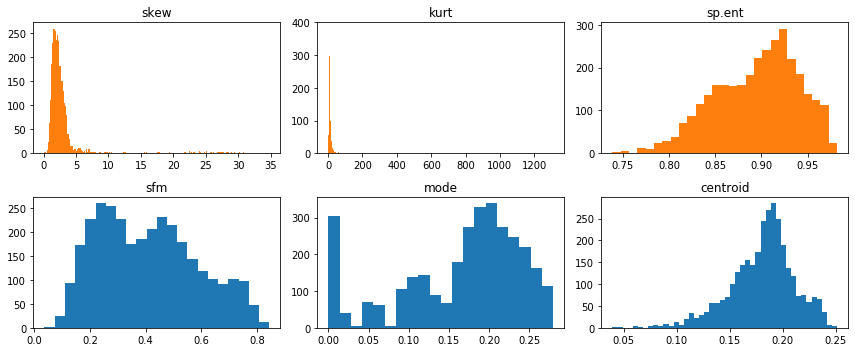

In [41]:
plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.title("skew")
plt.hist(sound_c["skew"], bins='auto', color="C1")
plt.subplot(2, 3, 2)
plt.title("kurt")
plt.hist(sound_c["kurt"], bins='auto', color="C1")
plt.subplot(2, 3, 3)
plt.title("sp.ent")
plt.hist(sound_c["sp.ent"], bins='auto', color="C1")
plt.subplot(2, 3, 4)
plt.title("sfm")
plt.hist(sound_c["sfm"], bins='auto')
plt.subplot(2, 3, 5)
plt.title("mode")
plt.hist(sound_c["mode"], bins='auto')
plt.subplot(2, 3, 6)
plt.title("centroid")
plt.hist(sound_c["centroid"], bins='auto')
plt.tight_layout()
plt.show()

Como é possível observar alguns dos atributos tem seu histograma próximo ao formato de uma distribuição gaussiana. Abaixo, são apresentados as Densidades de Probabilidade dos mesmos dados, entretanto escalonados usado a seguinte operação:

$y = \frac{x-\mu}{\sigma}$

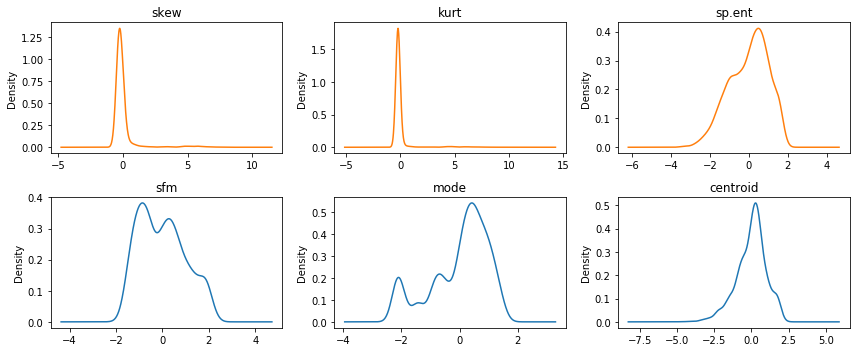

In [99]:
scaler = Scaler()
sound_c.loc[:]["skew"] = scaler.fit_transform(sound_c["skew"])
sound_c.loc[:]["kurt"] = scaler.fit_transform(sound_c["kurt"])
sound_c.loc[:]["sp.ent"] = scaler.fit_transform(sound_c["sp.ent"])
sound_c.loc[:]["sfm"] = scaler.fit_transform(sound_c["sfm"])
sound_c.loc[:]["mode"] = scaler.fit_transform(sound_c["mode"])
sound_c.loc[:]["centroid"] = scaler.fit_transform(sound_c["centroid"])

x, mean, std = sound_c["skew"], np.mean(sound_c["skew"]), np.std(sound_c["skew"])

plt.figure(figsize=(12, 5))
plt.subplot(2, 3, 1)
plt.title("skew")
sound_c["skew"].plot.kde(color="C1")
plt.subplot(2, 3, 2)
plt.title("kurt")
sound_c["kurt"].plot.kde(color="C1")
plt.subplot(2, 3, 3)
plt.title("sp.ent")
sound_c["sp.ent"].plot.kde(color="C1")
plt.subplot(2, 3, 4)
plt.title("sfm")
sound_c["sfm"].plot.kde()
plt.subplot(2, 3, 5)
plt.title("mode")
sound_c["mode"].plot.kde()
plt.subplot(2, 3, 6)
plt.title("centroid")
sound_c["centroid"].plot.kde()

plt.tight_layout()
plt.show()